 **Title: Predicting the Efficiency of Academic Courses versus Online Courses in the Job Market**

 Assignment 2

Group members:
 Tasin Tayeba Khan 2031437642, Khurshed 2031270042, Abu Mukaddim Rahi 2022027042,
 Amanullah Ahsan 2021769642


Create a dataframe with the collected data using pandas.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("data1.csv")

# Display the DataFrame
print(df)

# Drop the "timestamp" column as it is not important
df.drop(columns="Timestamp", inplace=True)

# Save the DataFrame to a new CSV file
df.to_csv("updated_user.csv", index=False)


                        Timestamp What is your age? What is your gender?  \
0    2024/02/28 10:11:34 PM GMT+6           21 - 25               Female   
1    2024/02/28 10:28:22 PM GMT+6           21 - 25                 Male   
2    2024/02/28 10:54:58 PM GMT+6           21 - 25                 Male   
3    2024/03/01 11:40:40 PM GMT+6           21 - 25                 Male   
4    2024/03/01 11:45:48 PM GMT+6           21 - 25                 Male   
..                            ...               ...                  ...   
279  2024/04/27 10:14:00 PM GMT+6           26 - 30                 Male   
280  2024/04/27 10:16:58 PM GMT+6           26 - 30                 Male   
281  2024/04/27 10:17:51 PM GMT+6           26 - 30               Female   
282  2024/04/27 10:18:32 PM GMT+6           26 - 30               Female   
283  2024/04/27 10:19:10 PM GMT+6           31 - 35               Female   

    Which city do you currently reside in?  \
0                                   Uttar

Data preprocessing


In [5]:
# Handling empty cells: drop rows with missing values
df.dropna(inplace=True)

# Handling data in the wrong format: The only open ended question is 'which chity do you reside in,
#therefore we only have to fix the data for that column.

# Standardize city names to title case
df['Which city do you currently reside in?'] = df['Which city do you currently reside in?'].str.title()

# Remove leading and trailing white spaces
df['Which city do you currently reside in?'] = df['Which city do you currently reside in?'].str.strip()


# Handling wrong data: our collected data is unlikely to be wrong as all are close ended questions
#and user has to select one from the options set by us.


# Handling duplicates:
df.drop_duplicates(inplace=True)

# After cleaning, reset the index
df.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(df)


    What is your age? What is your gender?  \
0             21 - 25                 Male   
1             21 - 25                 Male   
2             21 - 25                 Male   
3             21 - 25                 Male   
4             21 - 25                 Male   
..                ...                  ...   
210           31 - 35                 Male   
211           26 - 30                 Male   
212           26 - 30               Female   
213           26 - 30               Female   
214           31 - 35               Female   

    Which city do you currently reside in?  \
0                              Bashundhara   
1                                    Dhaka   
2                                    Dhaka   
3                                    Dhaka   
4                                    Dhaka   
..                                     ...   
210                                  Dhaka   
211                                  Dhaka   
212                              

Q1) Linear Regression

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Conduct necessary conversions

salary_mapping = {
    "Under 20,000": 10000,
    "20,000 - 50,000": 35000,
    "50,000 - 80,000": 65000,
    "80,000 - 110,000" : 95000,
    "110,000 - 150,000" : 135000,
    "150,000 - 200,000" : 175000,
    "above 200,000": 250000
}
df['salary_numeric'] = df['What is your current monthly earning?'].map(salary_mapping)

course_mapping = {
    "1 - 3": 2,
    "4 - 6": 5,
    "7 - 9": 8,
    "10+": 12
}

# Map the course ranges to numeric values
df['courses_numeric'] = df['How many online courses did you do altogether?'].map(course_mapping)

course_frequency_mapping = {
    "Very Often": 12,
    "Often": 8,
    "Sometimes": 5,
    "Rarely": 2
}

# Map the course ranges to numeric values
df['courses_frequency'] = df['How often did you resort to online courses each semester?'].map(course_frequency_mapping)


cgpa_mapping = {
    "3.5 - 4.0": 3.75,
    "3.0 - 3.5": 3.25,
    "2.5 - 3.0": 2.75,
    "2.0 - 2.5": 2.25,
    "1.0 - 2.0": 1.5
}

# Map the CGPA ranges to numeric values
df['cgpa_numeric'] = df['What CGPA did you graduate with?'].map(cgpa_mapping)

# Split the data into features (X) and target variable (y)
X = df[['courses_numeric', 'courses_frequency', 'cgpa_numeric']]
y = df['salary_numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)



print("Mean Squared Error:", mse)


# Example prediction for a new student
new_student = [[5, 3, 3.8]]  # Example: 5 courses, 3 times online class frequency, CGPA of 3.8
predicted_salary = model.predict(new_student)
print("Predicted Salary for the new student:", predicted_salary)


Mean Squared Error: 672821279.3454223
Predicted Salary for the new student: [79895.7854882]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


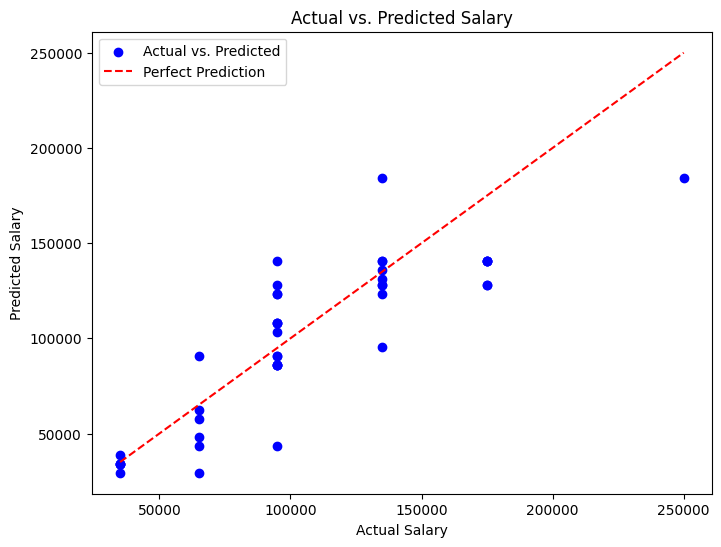

In [12]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted salary
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.legend()
plt.show()


Q2) Logistic Regression

In [13]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into features (X) and target variable (y)
X = df[['courses_numeric', 'courses_frequency', 'cgpa_numeric']]
median_salary = df['salary_numeric'].median()
y=df['salary_binary'] = df['salary_numeric'].apply(lambda x: 'high' if x > median_salary else 'low')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)


# Example prediction for a new student
new_student = [[9, 7, 3.8]]  # Example: 9 courses, 7 times online class frequency, CGPA of 3.8
predicted_salary = model.predict(new_student)
print("Predicted Salary for the new student:", predicted_salary)


Accuracy: 0.8837209302325582
Predicted Salary for the new student: ['high']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Q3) KNN

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target variable (y)
X = df[['courses_numeric', 'courses_frequency', 'cgpa_numeric']]
y = df['salary_numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
k = 8
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)


print("Mean Squared Error:", mse)


# Example prediction for a new student
new_student = [[5, 3, 3.8]]  # Example: 5 courses, 3 times online class frequency, CGPA of 3.8
new_student_scaled = scaler.transform(new_student)
predicted_salary = model.predict(new_student_scaled)
print("Predicted Salary for the new student:", predicted_salary)


Mean Squared Error: 643304869.1860465
Predicted Salary for the new student: [61250.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Note: our Mean Squared Error shows a high value because salaries are typically larger numbers. The differences between salaraies can be large numbers, however, they are not necessarily a large percentage of the salary. Therefore, when the error is squared, the Mean Squared Error results in a relatively large value.